### Exploratory data analysis

Exploratory data analysis of the cleaned climb harder survey data. The columns of the data are either boolean columns (generally did the report a particular type of training or not) or numeric. We will look at these variables seperately so we can best visualise them.

### Imports
All imports occur here:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("cleaned_data.csv")
print(df.shape)
df.head()

(537, 51)


,sex,height_cm,weight_kg,arm_span_cm,climbing_years,climbing_frequency,training_hours,hangboard_frequency,campus_frequency,endurance_frequency,...,climbs_indoors,climbs_outdoors,boulders,route_climbs,cardio,yoga,climbing_session_length,general_strength_session_length,campus_session_length,max_boulder_grade
0,True,173.0,77.0,178.0,4.75,4,6,0,0,1,...,True,True,False,True,False,False,2.000000,1.333333,0.0,8.0
1,True,180.0,81.0,180.0,3.25,1,10,2,0,1,...,True,False,False,False,False,True,3.000000,1.000000,0.0,3.0
2,True,178.0,67.0,175.0,0.75,3,3,2,0,2,...,True,True,False,False,True,False,1.333333,0.666667,0.0,7.0
3,True,173.0,70.0,178.0,9.25,2,1,1,0,1,...,True,True,False,False,False,False,3.000000,0.000000,0.0,5.0
4,True,184.0,84.0,197.0,6.75,6,2,4,0,2,...,True,True,False,True,False,False,1.666667,0.500000,0.0,10.0


### NAs

In [67]:
na_values = df.isnull().sum()
na_values[na_values != 0]

arm_span_cm                         33
max_pull_ups                       120
climbing_session_length              2
general_strength_session_length      5
campus_session_length                2
max_boulder_grade                   17
dtype: int64

### We'll make a list of numeric and categorical variables

In [68]:
numeric_cols = list(df.select_dtypes(include=np.number))
bool_cols = list(df.select_dtypes(include=bool))

assert len(numeric_cols) + len(bool_cols) == df.shape[1] # Check numeric and bool cols exhaustive

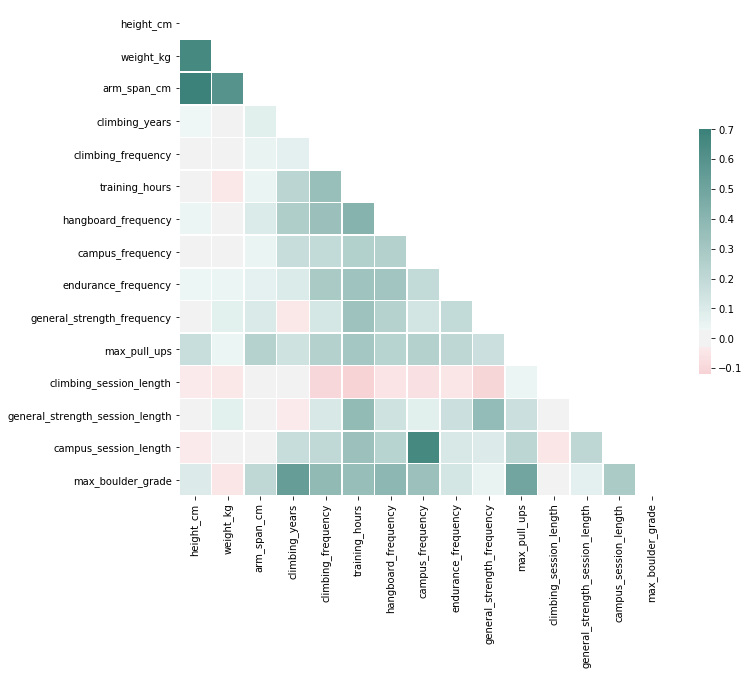

In [69]:
# Check correlations in numeric columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # To remove diagonal
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 180, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Correlation plot shows lots of somewhat expected results:**
- `max_boulder_grade` is along the bottom.
- Climbing frequency is positively correlated with max_boulder_grade.
- `climbing_years` is positively correlated with climbing grade.
- Weight is slightly negatively correlated with climbing grade.
- All forms of training are positively correlated with `max_boulder_grade`.

**Some interesting results:**
- `climbing_session_length` is not correlated with max_boulder_grade, whereas `climbing_frequency` is. So people who climb frequently, but not neccersarily for long sessions, tend to perform better.


### Bool columns

For visualisation, we'll split the bool columns into more climbing specifc training related columns, and more miscellaneous columns.

In [70]:
trains_cols = [col for col in bool_cols if col.startswith('trains_')] + ["max_boulder_grade"]
other_cols = list(set(bool_cols)-set(trains_cols)) + ["max_boulder_grade"]

In [71]:
def plot_boxplot(df):
    fig, ax = plt.subplots(figsize=(24,24))
    mdf = pd.melt(df, id_vars=['max_boulder_grade'], var_name=['trains'])
    ax = sns.boxplot(x="trains", y="max_boulder_grade", hue="value", data=mdf, ax = ax)  # RUN PLOT
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

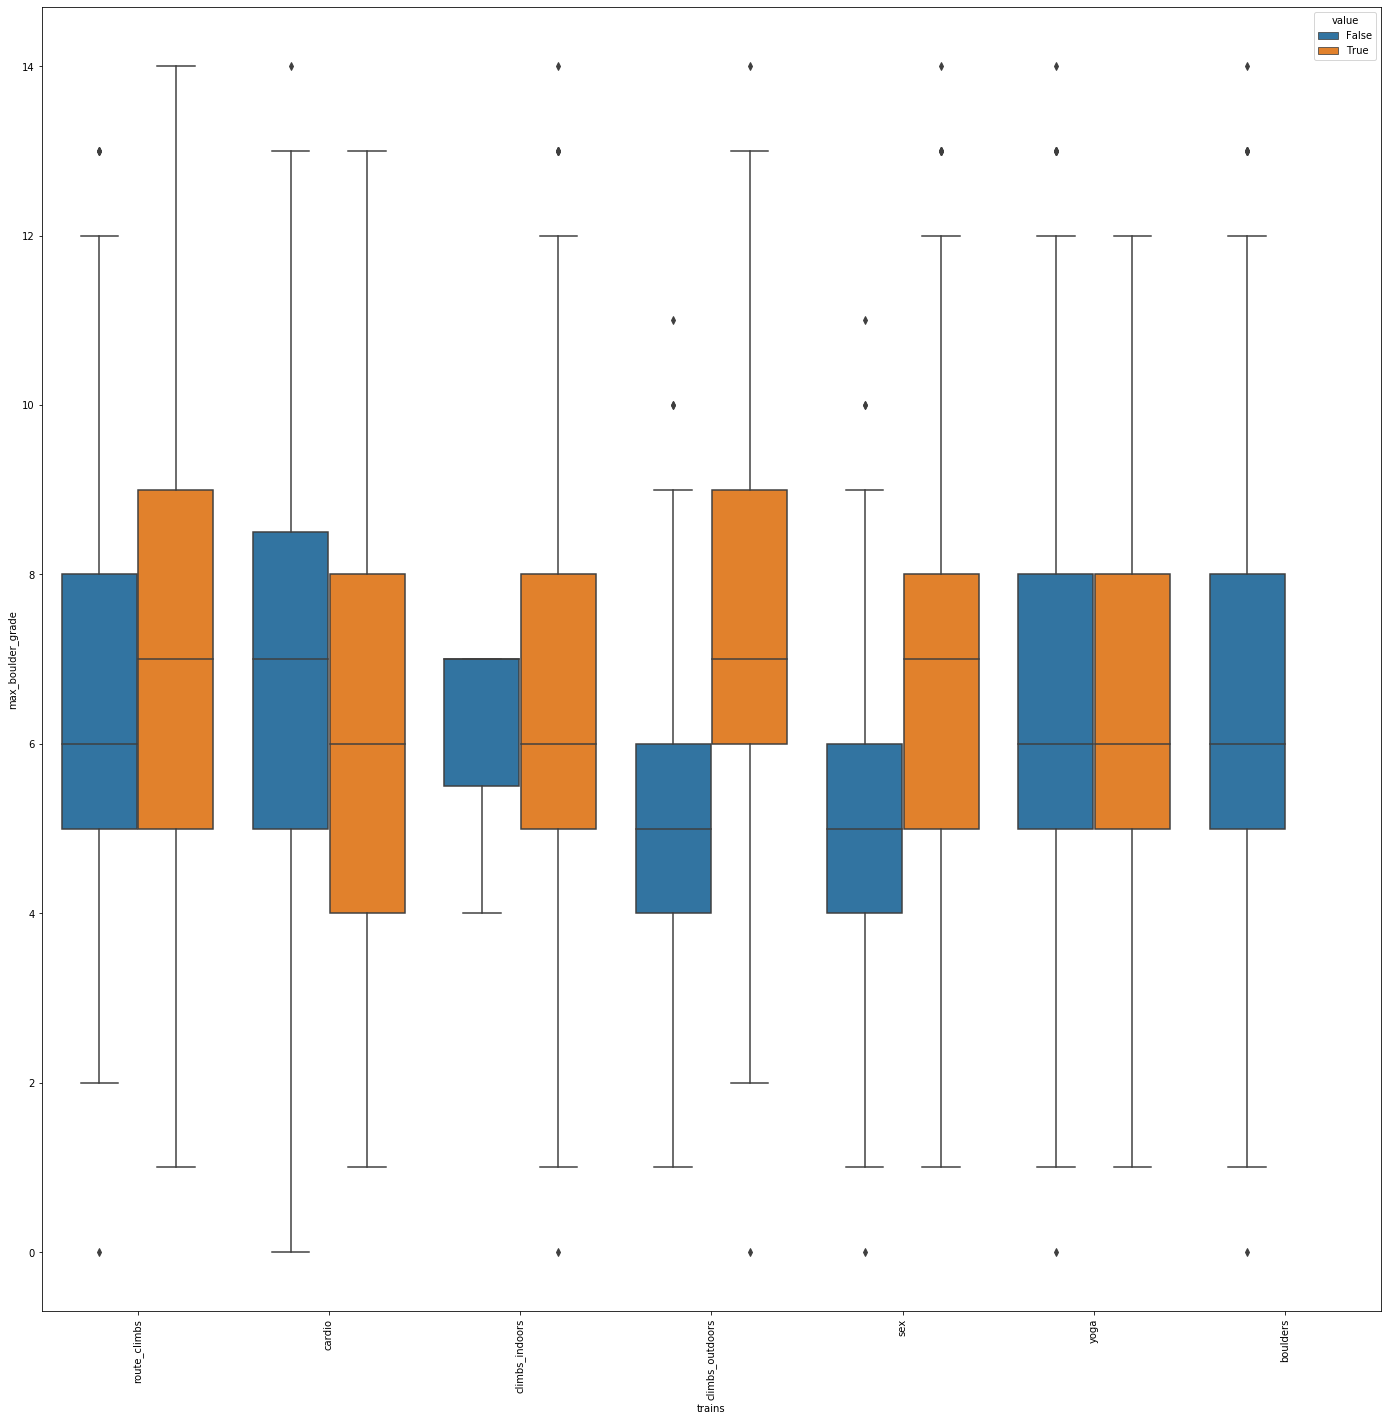

In [73]:
plot_boxplot(df[other_cols])

**Interesting observations:**
- Suprisingly, cardio seems to have a negative association with `max_boulder_grade`. Perhaps this is due to the bodies finite capacity for recovery being used up after cardio?
- Climbing outdoors is also strongly correlated with `max_boulder_grade`. I suspect, although there is no way to test it, that this may be at least partly because people generally only cout their maximum outdoor grade as their maximum climbed grade, so people who climb outdoors more have more opportunities for a new max grade.
- Men on average tend to be stronger.
- Yoga seems to have little impact on `max_boulder_grade`

Now let's look at the other climbing specific training activities:

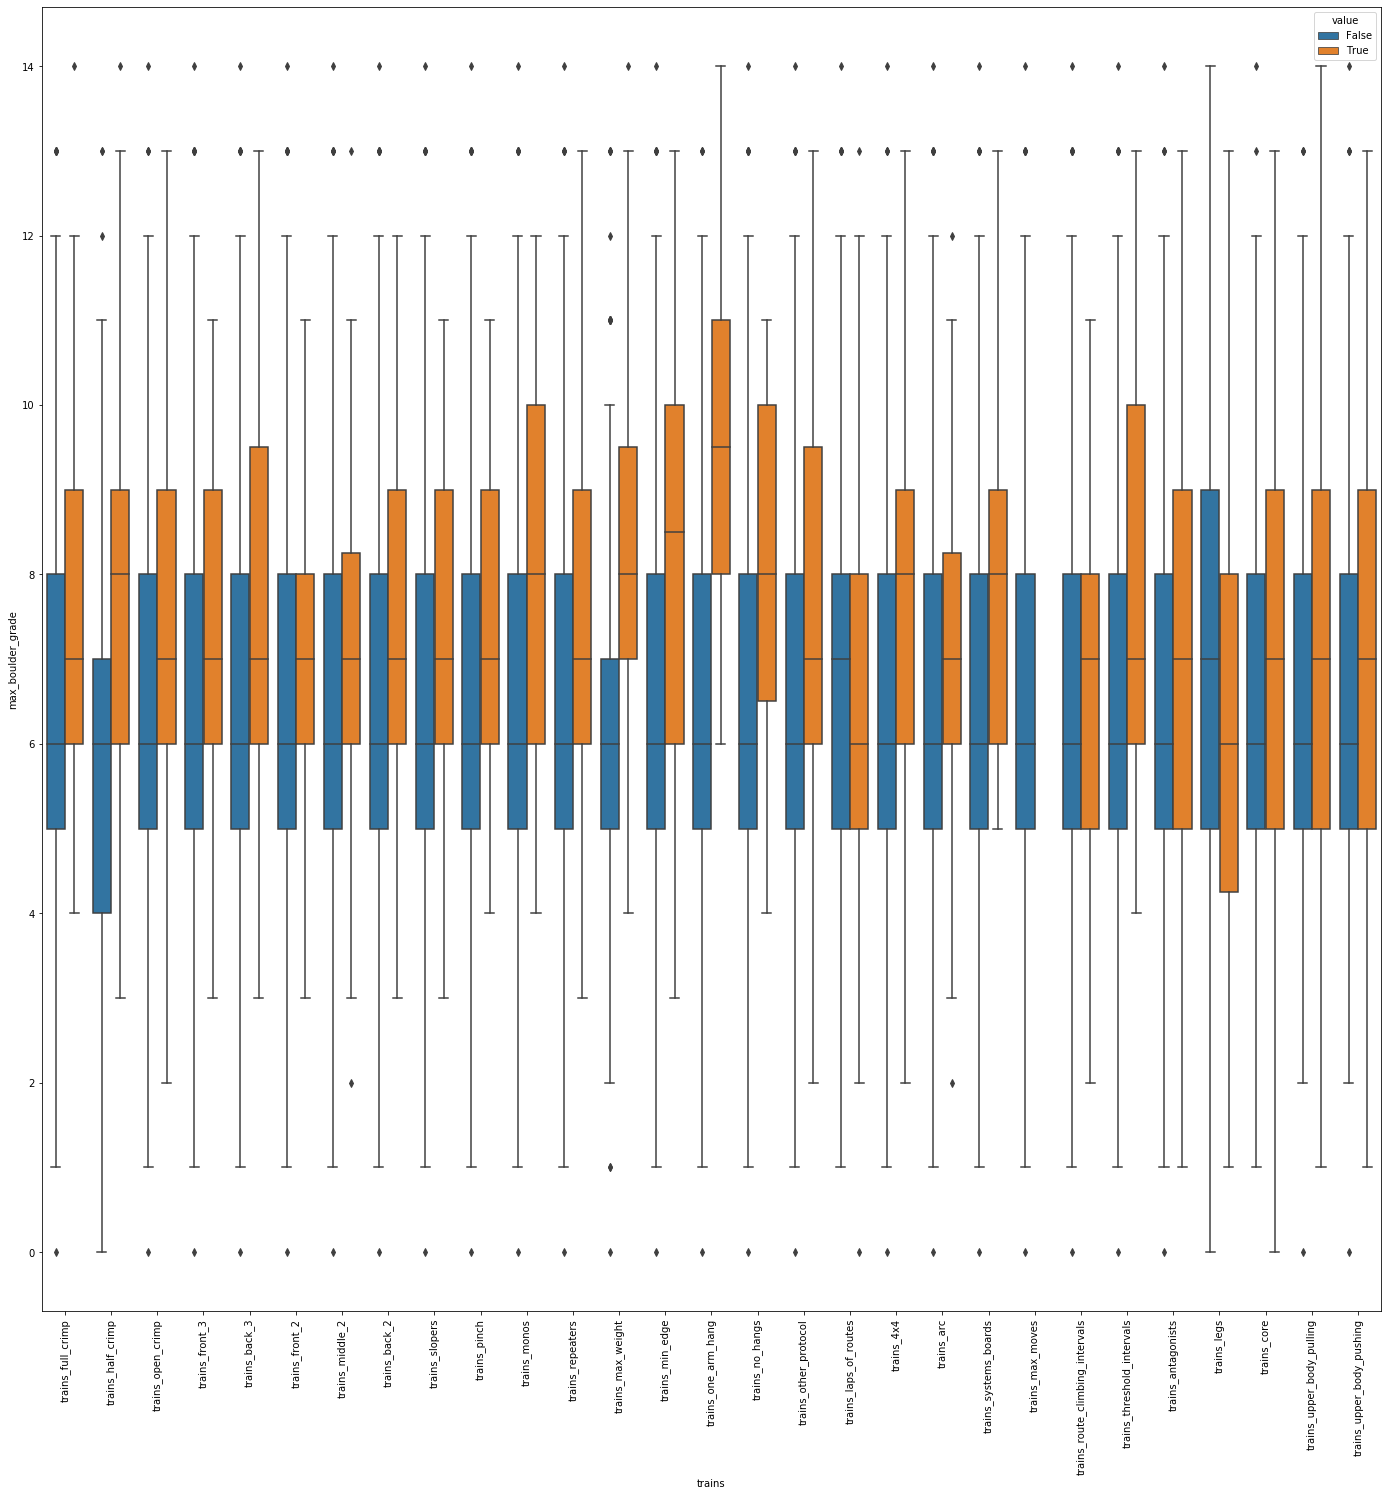

In [77]:
plot_boxplot(df[trains_cols])

We can see that virtually all forms of training are associated with increased `max_boulder_grade` (as the orange bars are shifted upwards). However, perhaps unsurprisingly, training legs seems to have a slightly negative impact on performance.

Training of one arm hangs is in particular highly correlated with `max_boulder_grade`, but it is worth emphasising that this cannot be deemed causal, especially as it's virtually impossible to train one arm hangs before climbing hard.

Pushing and core exercises are only weakly correlated with `max_boulder_grade'.